In [1]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#data scaling
from sklearn.preprocessing import StandardScaler
#hyperparameter optimization
from sklearn.model_selection import GridSearchCV
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train =  pd.read_csv('adult-training.csv',header = None)
df_test =  pd.read_csv('adult-test.csv',header = None)


In [6]:
df_train.shape

(32561, 15)

In [4]:
df_test.shape

(16281, 15)

# Data Preprocessing - Reading in Tabular format and creating Target

In [5]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num", 
           "marital_status", "occupation", "relationship", "race", "gender", 
           "capital_gain", "capital_loss", "hours_per_week", "native_country", "Target"]
df_test.columns = columns
df_train.columns = columns
df_train['Target']=np.where(df_train['Target'] ==' <=50K', 0, df_train['Target'])
df_train['Target']=np.where(df_train['Target'] ==' >50K', 1, df_train['Target'])
df_test['Target']=np.where(df_test['Target'] ==' <=50K.', 0, df_test['Target'])
df_test['Target']=np.where(df_test['Target'] ==' >50K.', 1, df_test['Target'])

# Statistical Analysis 

In [7]:
df_train.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [8]:
df_train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
df_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [10]:
df_train['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
df_train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
df_train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
df_train['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [25]:
Neg = df_train['Target'].value_counts()
print(Neg)
print("Class Discrimination Coefficient ---> " + str((Neg[1] / (Neg[1]+Neg[0]))*100))

0    24720
1     7841
Name: Target, dtype: int64
Class Discrimination Coefficient ---> 24.080955744602438


<Container object of 2 artists>

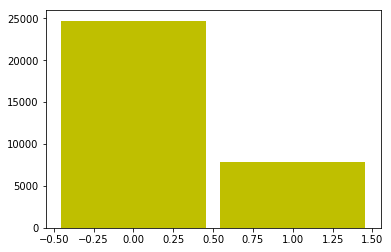

In [26]:
x=[0,1]
#tp = [Pos , Neg ]
plt.bar(x , Neg, label = 'bar count ' ,  color ='y' , width = 0.91)


In [29]:
df_train.groupby('Target').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
Target,,,,,,
0,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
1,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


This suggests that the population purchaisng the product has an age of about 44 which is therefore in the subclass section of middle age , with capital gain much greater than capital loss , working dedicatedly for aout 45 hours a week . 

In [119]:
df_train.groupby('native_country').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
native_country,,,,,,
?,38.725557,193300.897084,10.598628,1806.518010,118.265866,41.512864
Cambodia,37.789474,193080.368421,8.789474,1027.842105,183.052632,40.894737
Canada,42.545455,179852.933884,10.652893,1504.132231,129.933884,40.404959
China,42.533333,179047.986667,11.120000,366.480000,179.520000,37.786667
Columbia,39.711864,225149.406780,9.372881,180.610169,27.152542,39.067797
Cuba,45.768421,246291.347368,9.600000,367.231579,70.042105,39.157895
Dominican-Republic,37.728571,192089.557143,7.114286,1476.057143,25.171429,42.471429
Ecuador,36.642857,185858.821429,9.464286,527.607143,0.000000,39.571429
El-Salvador,34.132075,254392.971698,6.839623,574.320755,31.113208,36.792453


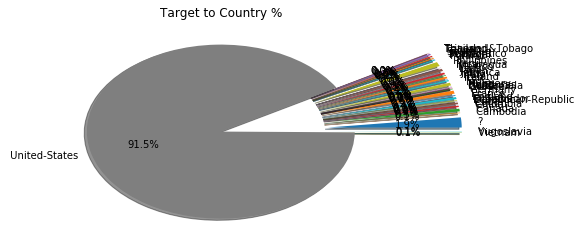

In [118]:
a = np.full(
    shape=40,
    fill_value=0.8,
    dtype=np.float)

a[37]=0
Country_name = Tar.native_country.unique()
Country_name.sort()
Tar = df_train[df_train['Target']==1]
amount = Tar.groupby('native_country')['Target'].count()
plt.pie(amount,labels=Country_name,autopct ='%1.1f%%', shadow =True , explode = a)
plt.title('Target to Country %')
plt.show()


In [33]:
df_train.groupby('relationship').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
relationship,,,,,,
Husband,43.818616,187074.862503,10.326461,1795.062230,124.160919,44.120139
Not-in-family,38.346057,191131.795304,10.315593,743.327273,75.390728,40.595665
Other-relative,33.164118,205059.821611,8.786952,279.595311,51.332314,37.006116
Own-child,24.827940,193175.408840,9.486188,155.655485,39.511839,33.269337
Unmarried,40.293964,191128.405688,9.642194,455.031050,41.464887,39.103018
Wife,39.846301,181849.507653,10.463010,1659.791454,118.006378,36.861607


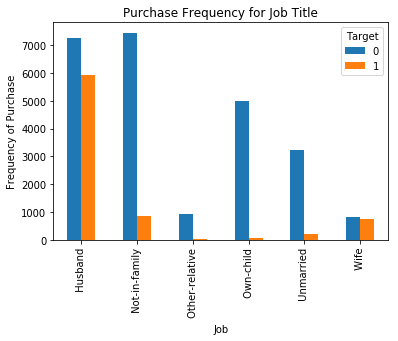

In [44]:
pd.crosstab(df_train.relationship,df_train.Target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [31]:
df_train.groupby('occupation').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
occupation,,,,,,
?,40.882800,188658.667390,9.253391,604.491047,60.529571,31.906131
Adm-clerical,36.964456,192043.396286,10.113528,495.954907,60.794430,37.558355
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667
Craft-repair,39.031471,192132.599658,9.110759,649.512808,88.465235,42.304221
Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703
Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940
Handlers-cleaners,32.165693,204391.006569,8.510219,257.572993,45.635766,37.947445
Machine-op-inspct,37.715285,195040.877622,8.487512,328.689311,61.706294,40.755744
Other-service,34.949621,188608.452200,8.779666,191.301669,38.250683,34.701669


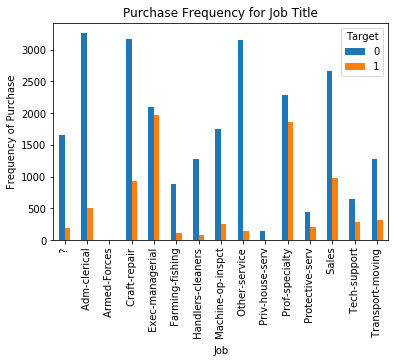

In [42]:
pd.crosstab(df_train.occupation,df_train.Target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [34]:
df_train.groupby('education').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


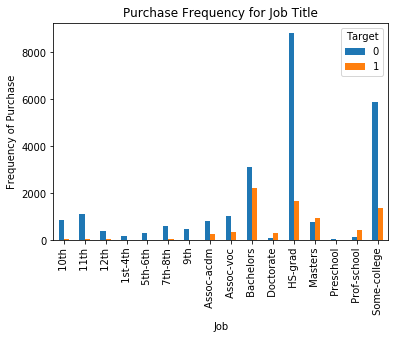

In [45]:
pd.crosstab(df_train.education,df_train.Target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [36]:
df_train.groupby('workclass').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
workclass,,,,,,
?,40.960240,188516.338235,9.260349,606.795752,60.760349,31.919390
Federal-gov,42.590625,185221.243750,10.973958,833.232292,112.268750,41.379167
Local-gov,41.751075,188639.712852,11.042045,880.202580,109.854276,40.982800
Never-worked,20.571429,225989.571429,7.428571,0.000000,0.000000,28.428571
Private,36.797585,192764.114734,9.879714,889.217792,80.008724,40.267096
Self-emp-inc,46.017025,175981.344086,11.137097,4875.693548,155.138889,48.818100
Self-emp-not-inc,44.969697,175608.641480,10.226289,1886.061787,116.631641,44.421881
State-gov,39.436055,184136.613251,11.375963,701.699538,83.256549,39.031587
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286


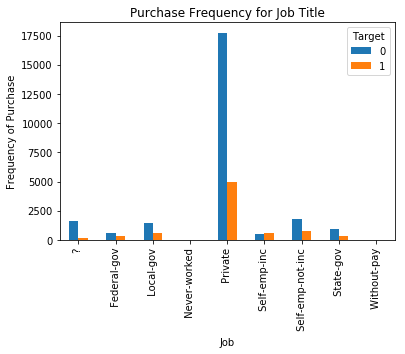

In [46]:
pd.crosstab(df_train.workclass,df_train.Target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [37]:
df_train.groupby('marital_status').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
marital_status,,,,,,
Divorced,43.041639,185802.790457,10.030385,728.414810,64.600720,41.246680
Married-AF-spouse,32.478261,188165.565217,10.173913,432.652174,0.000000,41.130435
Married-civ-spouse,43.247596,186763.172877,10.320646,1764.859509,122.439103,43.284856
Married-spouse-absent,40.578947,193141.760766,9.308612,653.983254,57.779904,39.669856
Never-married,28.150988,195383.308996,9.962464,376.588318,52.345502,36.939998
Separated,39.354146,206444.325854,9.293659,535.568780,58.110244,39.301463
Widowed,58.975831,174159.042296,9.093656,571.071501,79.666667,32.979859


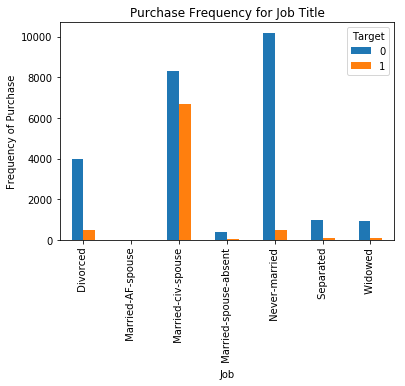

In [47]:
pd.crosstab(df_train.marital_status,df_train.Target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [125]:
# Feature engineer the label
df_train['label'] = df_train['Target'].apply(lambda x: 1 if x == 1 else 0)

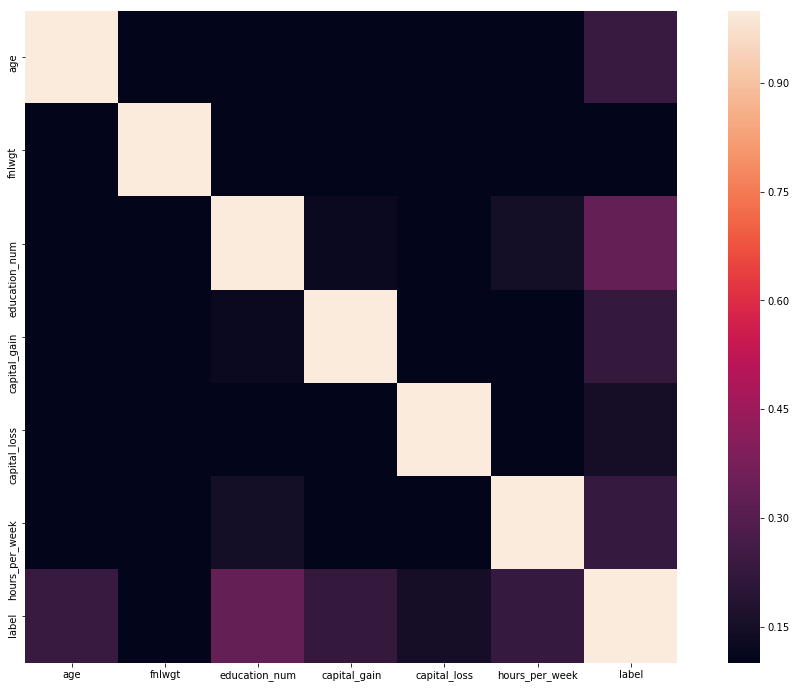

In [126]:
corrmatrix = df_train.corr()
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corrmatrix, vmin=0.1, square=True)

In [133]:
largest = corrmatrix.nlargest(10, 'label')['label']
best_corr_index = largest[1:5].index
best_corr_index

Index(['education_num', 'age', 'hours_per_week', 'capital_gain'], dtype='object')

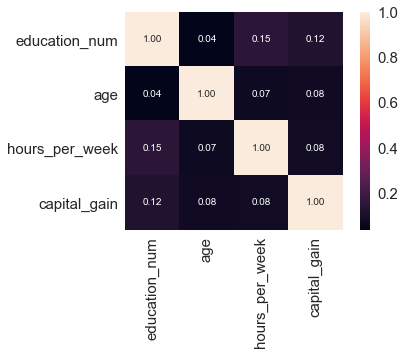

In [135]:
cm = np.corrcoef(df_train[best_corr_index].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=best_corr_index.values, xticklabels=best_corr_index.values)
plt.show()

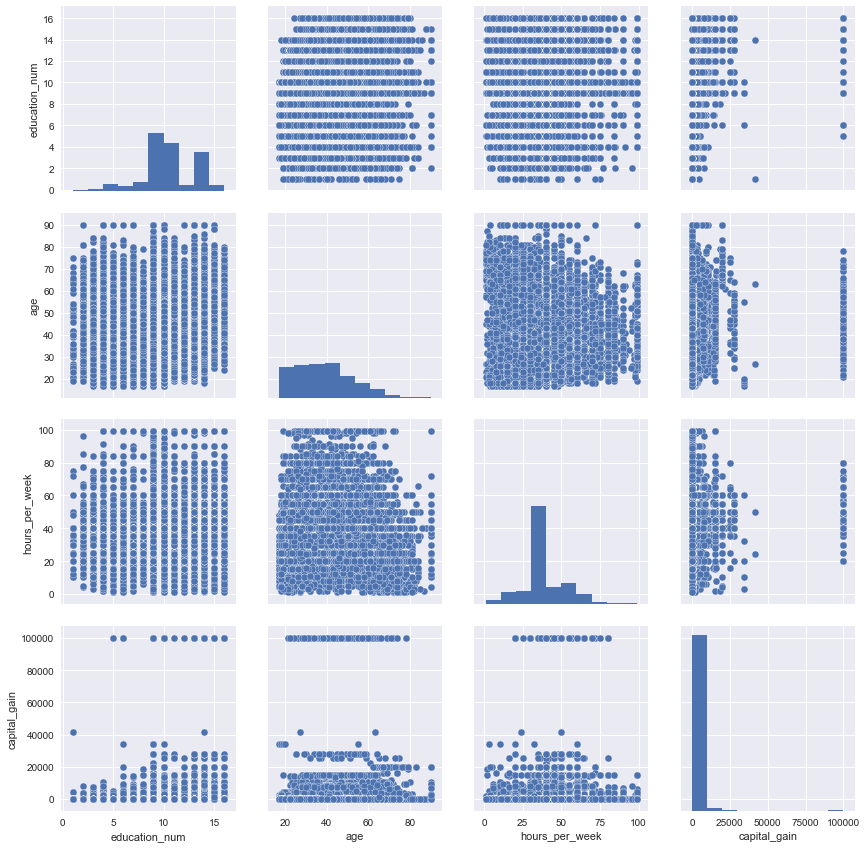

In [137]:
# Scatterplot
sns.set()
sns.pairplot(df_train[best_corr_index], size=3)
plt.show()

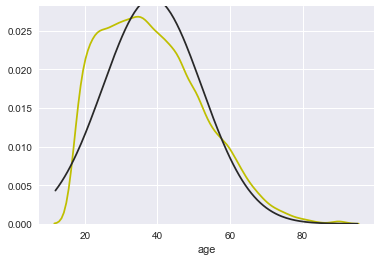

In [161]:
from scipy.stats import norm
sns.distplot(df_train['age'], hist=False,bins=int(90/5), fit=norm , color="y")

Right Skewed --> availabilty of extreme values near the minimum end



negative kutosis --> lack of outliers


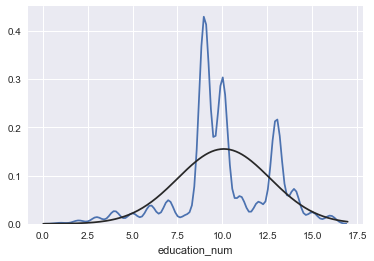

In [154]:
sns.distplot(df_train['education_num'], hist=False, fit=norm)

There exists a difference of pattern in purchasal of the target with variation to education numbers




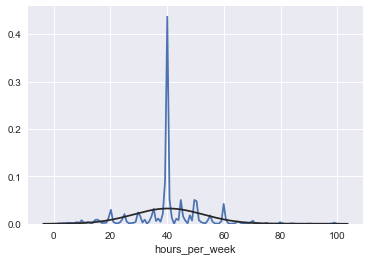

In [153]:
sns.distplot(df_train['hours_per_week'], hist=False, fit=norm)

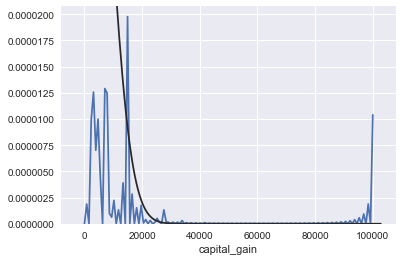

In [152]:
sns.distplot(df_train['capital_gain'], hist=False,bins=int(100000/5000), fit=norm)

In [165]:
df_train=df_train.drop('label',axis=1)

# Data Preprocessing - Nan and Categorical Data 

In [166]:
y_train = df_train.iloc[:,-1]
df_train = df_train.drop('Target',axis=1)
y_test = df_test['Target']
df_test = df_test.drop('Target',axis=1)

In [167]:
counting_nan = pd.DataFrame({"Counting nan": df_train.isnull().sum().sort_values(ascending=False)})
counting_nan

,Counting nan
native_country,0
hours_per_week,0
capital_loss,0
capital_gain,0
gender,0
race,0
relationship,0
occupation,0
marital_status,0
education_num,0


In [168]:
counting_nan = pd.DataFrame({"Counting nan": df_test.isna().sum().sort_values(ascending=False)})
counting_nan

,Counting nan
native_country,0
hours_per_week,0
capital_loss,0
capital_gain,0
gender,0
race,0
relationship,0
occupation,0
marital_status,0
education_num,0


In [169]:
if y_train.count() == y_train.isna().count() :
    print('No effective null values present in y_train')
if y_test.count() == y_test.isna().count() :
    print('No effective null values present in y_test')

No effective null values present in y_train
No effective null values present in y_test


In [170]:
def preprocess(df):
  numeric_variables = list(df.select_dtypes(include=['int64','float']).columns.values)
  df[numeric_variables]=df[numeric_variables].apply(lambda x: x.fillna(x.median()),axis=0)
  categorical_variables = list(df.select_dtypes(exclude=['int64','float','bool']).columns.values)
  df[categorical_variables]=df[categorical_variables].apply(lambda x: x.fillna("None"),axis=0)
  df = pd.get_dummies(df, prefix_sep="__",columns=categorical_variables)  
  return df

In [171]:
df_train = preprocess(df_train)
df_test =  preprocess(df_test)


In [172]:
# Get missing columns in the training test
missing_cols = set( df_train.columns ) - set( df_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
df_test = df_test[df_train.columns]
df_test.shape

(16281, 108)

In [173]:
df_train.shape

(32561, 108)

In [174]:
y_test.unique()
y_test=y_test.astype('int')

In [175]:
y_train.unique()
y_train=y_train.astype('int')


# Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'liblinear' , random_state=0)#random_state=0, solver='lbfgs',multi_class='multinomial').fit(df_train, y_train)
clf.fit(df_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [177]:
y_train_pred = clf.predict(df_train)

In [178]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_pred, y_train)

0.7979484659562053

In [179]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     24720
           1       0.72      0.26      0.39      7841

   micro avg       0.80      0.80      0.80     32561
   macro avg       0.76      0.62      0.63     32561
weighted avg       0.78      0.80      0.76     32561



In [180]:
y_pred = clf.predict(df_test)

In [181]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7995823352373933

In [182]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     12435
           1       0.71      0.26      0.38      3846

   micro avg       0.80      0.80      0.80     16281
   macro avg       0.76      0.61      0.63     16281
weighted avg       0.78      0.80      0.76     16281



Text(34,0.5,'Actual')

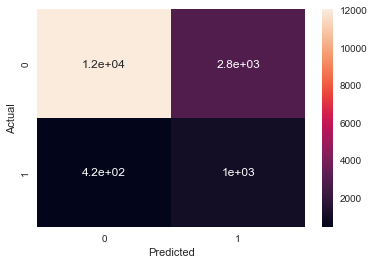

In [183]:
cfm = confusion_matrix(y_pred, y_test)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluating Model by Cross Validation with cv = 10 

In [184]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, df_train, y_train, scoring='accuracy', cv = 10)

In [185]:
accuracy.mean()

0.7976106839247766

In [186]:
accuracy = cross_val_score(clf, df_test, y_test, scoring='accuracy', cv = 10)

In [187]:
accuracy.mean()

0.7990904791637081